<a href="https://colab.research.google.com/github/Javierhhths/Estacionalidad_de_Lluvias_de_Sincerin_Bolivar/blob/main/Estacionalidad_de_las_lluvias_en_Sincer%C3%ADn_(Arjona%2C_Bol%C3%ADvar%2C_Colombia).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de librerías

import numpy as np
from numpy import array
import pylab
import pandas as pd
import pandas.util.testing as tm
from statsmodels.formula.api import ols
import statsmodels.api as sm
from matplotlib import pyplot
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import files
from pylab import *
from math import *
import io
import datetime as dt
import seaborn as sns
from matplotlib.transforms import Affine2D
import itertools

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import sys


In [ ]:
uploaded = files.upload()

Saving excel.csv.csv to excel.csv.csv


In [ ]:
Datos = pd.read_csv(io.StringIO(uploaded['excel.csv.csv'].decode('utf-8')))
Datos['Fecha'] = pd.to_datetime(Datos.Fecha)
Datos.set_index('Fecha',inplace=True)
Datosmes=Datos["Valor"]
Prec=Datosmes.resample(rule='M').sum()
Cuenta=Datosmes.resample(rule='M').count()
Mensual=pd.DataFrame(data=Prec)
Mensual['Cuenta']=Cuenta
Mensual

,Valor,Cuenta
Fecha,,
1940-10-31,80.0,31
1940-11-30,0.0,0
1940-12-31,0.0,0
1941-01-31,0.0,19
1941-02-28,20.0,28
...,...,...
2020-08-31,140.6,31
2020-09-30,147.9,30
2020-10-31,167.7,31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


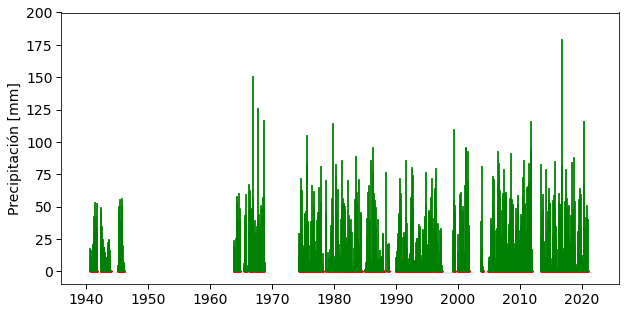

In [ ]:
#Serie de tiempo diaria

#SerieDiaria = pd.DataFrame(data=Datos[Datos['Fechas'].isin(pd.date_range('1940-01-01', '2020-12-31'))])

plt.rcParams["figure.figsize"]=(10, 5)
fig, ax = plt.subplots()
 
ax.set_ylabel('Precipitación [mm]', fontsize = 14)
#ax.set_title('Serie de precipitación diaria', fontsize = 15)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 5)
ax.tick_params(axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 5)
stemlines= ax.stem(Datos.index,Datos['Valor'],markerfmt=' ',basefmt=" ")
plt.setp(stemlines, 'linewidth', 1.8, color='green')
rojo= pd.DataFrame()
rojo['mm'] = Datos['Valor']
lista= range(1,len(Datos)+1)
rojo['DOY'] = lista
rojo['mm'][rojo['mm']>0]=None
rojo['mm'][rojo['mm']==0]=0
ax.set_xlim([datetime.date(1936, 1, 1), datetime.date(2025, 12, 31)])
ax.set_ylim([-10,200])
ax.scatter(Datos.index,rojo['mm'], marker=".", color='red', s=2)

In [ ]:
SerieMensual=Mensual.loc[((Mensual.index.days_in_month-Mensual.Cuenta)<5)]
SerieMensual

,Valor,Cuenta
Fecha,,
1940-10-31,80.0,31
1941-02-28,20.0,28
1941-03-31,10.0,31
1941-06-30,88.0,30
1941-07-31,122.0,31
...,...,...
2020-08-31,140.6,31
2020-09-30,147.9,30
2020-10-31,167.7,31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

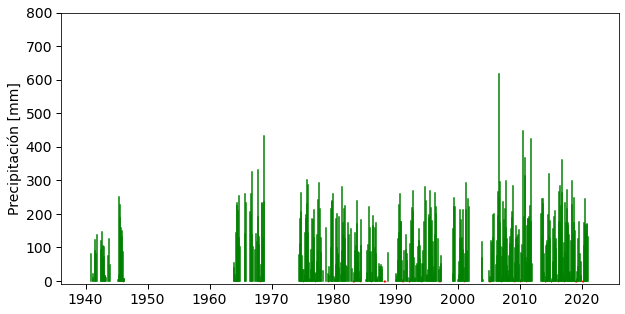

In [ ]:
#Serie de tiempo mensual

plt.rcParams["figure.figsize"]=(10, 5)
fig, ax = plt.subplots()
 
ax.set_ylabel('Precipitación [mm]', fontsize = 14)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 5)
ax.tick_params(axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 5)
stemlines= ax.stem(SerieMensual.index,SerieMensual['Valor'],markerfmt=' ',basefmt=" ")
plt.setp(stemlines, 'linewidth', 1.5, color='green')
rojo= pd.DataFrame()
rojo['mm'] = SerieMensual['Valor']
lista= range(1,len(SerieMensual)+1)
rojo['DOY'] = lista
rojo['mm'][rojo['mm']>0]=None
rojo['mm'][rojo['mm']==0]=0
ax.set_xlim([datetime.date(1936, 1, 1), datetime.date(2025, 12, 31)])
ax.set_ylim([-10,800])
ax.scatter(SerieMensual.index,rojo['mm'], marker=".", color='red', s=2)

In [ ]:
Datos = pd.read_csv(io.StringIO(uploaded['excel.csv.csv'].decode('utf-8')))
Datos['Fecha'] = pd.to_datetime(Datos.Fecha)
Datos.set_index('Fecha',inplace=True)
Datosaño=Datos["Valor"]
Prec=Datosaño.resample(rule='Y').sum()
Cuenta=Datosaño.resample(rule='Y').count()
Anual=pd.DataFrame(data=Prec)
Anual['Cuenta']=Cuenta
Anual

,Valor,Cuenta
Fecha,,
1940-12-31,80.0,31
1941-12-31,604.0,252
1942-12-31,700.0,214
1943-12-31,414.8,243
1944-12-31,0.0,14
...,...,...
2016-12-31,1978.2,366
2017-12-31,1600.2,365
2018-12-31,1506.7,363


In [ ]:
SerieAnual=Anual.loc[((365-Anual.Cuenta)<5)]
SerieAnual

,Valor,Cuenta
Fecha,,
1975-12-31,1615.5,365
1976-12-31,961.3,365
1977-12-31,1304.6,365
1992-12-31,1214.9,364
1995-12-31,1660.0,361
2000-12-31,1264.8,365
2007-12-31,1567.6,364
2011-12-31,1962.0,363
2014-12-31,1382.5,364


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

(-10.0, 3000.0)

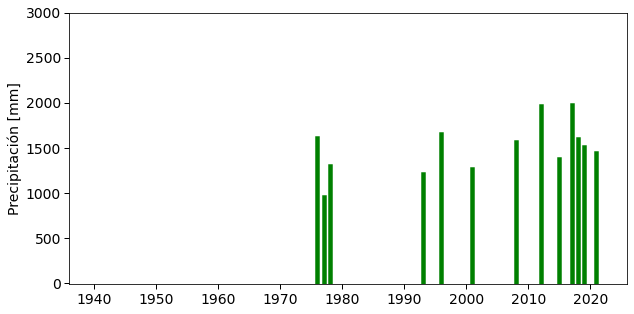

In [ ]:
#Serie de tiempo anual

plt.rcParams["figure.figsize"]=(10, 5)
fig, ax = plt.subplots()
 
ax.set_ylabel('Precipitación [mm]', fontsize = 14)
ax.tick_params(axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 5)
ax.tick_params(axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 5)
stemlines= ax.stem(SerieAnual.index,SerieAnual['Valor'],markerfmt=' ',basefmt=" ")
plt.setp(stemlines, 'linewidth', 4.5, color='green')
rojo= pd.DataFrame()
rojo['mm'] = SerieAnual['Valor']
lista= range(1,len(SerieAnual)+1)
rojo['DOY'] = lista
rojo['mm'][rojo['mm']>0]=None
rojo['mm'][rojo['mm']==0]=0
ax.set_xlim([datetime.date(1936, 1, 1), datetime.date(2025, 12, 31)])
ax.set_ylim([-10,3000])
#ax.scatter(SerieAnual.index,rojo['mm'], marker=".", color='red', s=2)

In [ ]:
#Tabla para ver los datos organizados por año y crear luego una columna con los datos promedio

Datos = pd.read_csv(io.StringIO(uploaded['excel.csv.csv'].decode('utf-8')))
Datos['Fecha'] = pd.to_datetime(Datos['Fecha'])
Datos['DOY'] = Datos['Fecha'].dt.dayofyear
Datos['Año'] = Datos['Fecha'].dt.year

Datosprom = pd.pivot_table(Datos, index = 'DOY', columns = 'Año', values = 'Valor')
Datosprom = Datosprom[:-1]
Años=list(Datosprom)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


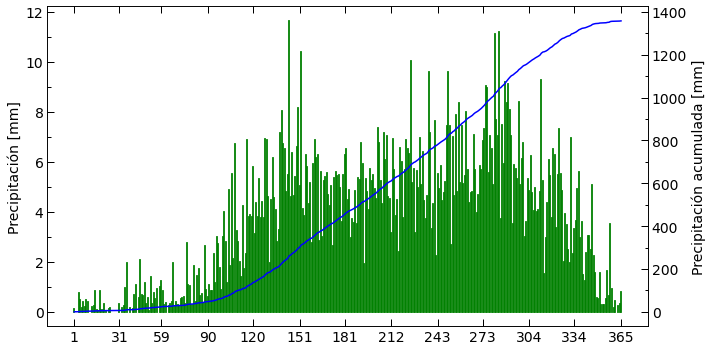

In [ ]:
#host: eje 1 (lluvia diaria)
#par1: eje 2 (lluvia diaria acumulada)
fig, host = plt.subplots()
par1 = host.twinx()
host.set_ylabel("Precipitación [mm]",fontsize = 14)
par1.set_ylabel("Precipitación acumulada [mm]",fontsize = 14)
#Otra manera de poner los años si tengo años faltantes
Datosprom = Datosprom[Años]
Datosprom['Prom'] = Datosprom.mean(axis = 1)
Datosprom['PAcum'] = Datosprom['Prom'].cumsum()
plt.xticks([1,31,59,90,120,151,181,212,243,273,304,334,365])
lista= range(1,366)
y=list(lista)
plt.rcParams["figure.figsize"]=(10,5)
markerline, stemlines, baseline= host.stem(y, Datosprom['Prom'],label = "Serie promedio",markerfmt=' ',basefmt=" ")
plt.setp(stemlines, 'linewidth', 1.8, color='green')
par1.plot(y, Datosprom['PAcum'],color='blue')
#host.set_title('Estacionalidad: Curva de masa', fontsize = 15)
par1.tick_params(direction='in',axis = 'y', which = 'major',labelsize = 14,width = 1.0, length = 7)
par1.yaxis.set_minor_locator(AutoMinorLocator(2)) 
par1.tick_params(direction='in',which = 'minor',width = 1.0, length = 3.5)
host.tick_params(direction='in',axis = 'y', which = 'major',labelsize = 14,width = 1.0, length = 7)
host.yaxis.set_minor_locator(AutoMinorLocator(2)) 
host.tick_params(direction='in',which = 'minor',width = 1.0, length = 3.5)
host.tick_params(direction='in',axis = 'x', which = 'major',labelsize = 14,width = 1.0, length = 7)
host.xaxis.set_ticks_position('both') 
fig.tight_layout()
#Para descargar la gráfica en formato png:  
#plt.savefig('Estacionalidad 1.png', bbox_inches = 'tight')
#files.download('Estacionalidad 1.png')

In [ ]:
#Esta parte crea una lista para cada mes y guarda todas las sumas de los meses (:31 quiere decir los primeros 31 valores de cada año, osea de enero). Es sólo una manera de hacerlo y puede ser más intuitivo para entender que se suman ciertos días de cada año para diferenciar por mes

Ene=np.array(SerieMensual[(SerieMensual['Valor'].index.month==1)]['Valor'])
Feb=np.array(SerieMensual[(SerieMensual['Valor'].index.month==2)]['Valor'])
Mar=np.array(SerieMensual[(SerieMensual['Valor'].index.month==3)]['Valor'])
Abr=np.array(SerieMensual[(SerieMensual['Valor'].index.month==4)]['Valor'])
May=np.array(SerieMensual[(SerieMensual['Valor'].index.month==5)]['Valor'])
Jun=np.array(SerieMensual[(SerieMensual['Valor'].index.month==6)]['Valor'])
Jul=np.array(SerieMensual[(SerieMensual['Valor'].index.month==7)]['Valor'])
Ago=np.array(SerieMensual[(SerieMensual['Valor'].index.month==8)]['Valor'])
Sep=np.array(SerieMensual[(SerieMensual['Valor'].index.month==9)]['Valor'])
Oct=np.array(SerieMensual[(SerieMensual['Valor'].index.month==10)]['Valor'])
Nov=np.array(SerieMensual[(SerieMensual['Valor'].index.month==11)]['Valor'])
Dic=np.array(SerieMensual[(SerieMensual['Valor'].index.month==12)]['Valor'])
 
#MesesSerieOriginal= np.array([Ene,Feb,Mar,Abr,May,Jun,Jul,Ago,Sep,Oct,Nov,Dic])
  
mins = np.array([min(Ene),min(Feb),min(Mar),min(Abr),min(May),min(Jun),min(Jul),min(Ago),min(Sep),min(Oct),min(Nov),min(Dic)])
maxes = np.array([max(Ene),max(Feb),max(Mar),max(Abr),max(May),max(Jun),max(Jul),max(Ago),max(Sep),max(Oct),max(Nov),max(Dic)])
means = np.array([mean(Ene),mean(Feb),mean(Mar),mean(Abr),mean(May),mean(Jun),mean(Jul),mean(Ago),mean(Sep),mean(Oct),mean(Nov),mean(Dic)])
std = np.array([np.std(Ene),np.std(Feb),np.std(Mar),np.std(Abr),np.std(May),np.std(Jun),np.std(Jul),np.std(Ago),np.std(Sep),np.std(Oct),np.std(Nov),np.std(Dic)])
per25s=np.array([np.percentile(Ene,25,axis=0),np.percentile(Feb,25,axis=0),np.percentile(Mar,25,axis=0),np.percentile(Abr,25,axis=0),np.percentile(May,25,axis=0),np.percentile(Jun,25,axis=0),np.percentile(Jul,25,axis=0),np.percentile(Ago,25,axis=0),np.percentile(Sep,25,axis=0),np.percentile(Oct,25,axis=0),np.percentile(Nov,25,axis=0),np.percentile(Dic,25,axis=0)])
per75s=np.array([np.percentile(Ene,75,axis=0),np.percentile(Feb,75,axis=0),np.percentile(Mar,75,axis=0),np.percentile(Abr,75,axis=0),np.percentile(May,75,axis=0),np.percentile(Jun,75,axis=0),np.percentile(Jul,75,axis=0),np.percentile(Ago,75,axis=0),np.percentile(Sep,75,axis=0),np.percentile(Oct,75,axis=0),np.percentile(Nov,75,axis=0),np.percentile(Dic,75,axis=0)])

[array([  0.   ,   0.   ,   3.1  ,  38.5  , 110.9  , 102.4  , 104.6  ,
        114.2  , 129.5  , 168.775,  80.9  ,  22.35 ]),
 array([  7.4  ,  23.625,  32.875, 128.2  , 211.7  , 194.9  , 201.55 ,
        215.85 , 224.275, 262.725, 175.575,  79.45 ])]

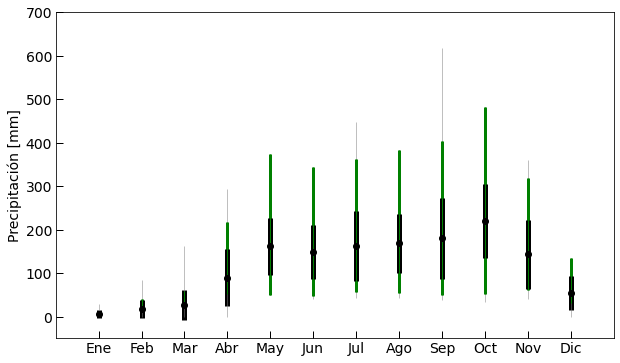

In [ ]:
plt.rcParams["figure.figsize"]=(10,6)
fig, ax = plt.subplots()
plt.errorbar(np.arange(1,13,1), means, [per25s,per75s],fmt='.k', ecolor='green', lw=3)
plt.errorbar(np.arange(1,13,1), means, std, fmt='.k', lw=5, ecolor='black', fillstyle='full')
plt.errorbar(np.arange(1,13,1), means, [means - mins, maxes - means],fmt='.k', ecolor='gray', lw=0.5)
plt.errorbar(np.arange(1,13,1), means, [per25s,per75s],fmt='ok', ecolor='green', lw=1)
plt.xlim(0, 13)
plt.ylim(-50,700)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov','Dic'])
ax.set_ylabel('Precipitación [mm]', fontsize = 14)
ax.tick_params(direction='in',axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 7)
ax.tick_params(direction='in',axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 7)
[per25s,per75s]

In [ ]:
SerieMensual=Mensual.loc[((Mensual.index.days_in_month-Mensual.Cuenta)<5) & (Mensual.index.year>=1963)]
SerieMensual

,Valor,Cuenta
Fecha,,
1963-11-30,53.5,30
1963-12-31,37.9,31
1964-02-29,18.2,29
1964-03-31,3.2,31
1964-04-30,143.2,30
...,...,...
2020-08-31,140.6,31
2020-09-30,147.9,30
2020-10-31,167.7,31


In [ ]:
EneNiña=[]; FebNiña=[]; MarNiña=[]; AbrNiña=[]; MayNiña=[]; JunNiña=[]; JulNiña=[]; AgoNiña=[]; SepNiña=[]; OctNiña=[]; NovNiña=[]; DicNiña=[]

aux=0

AñosEneroNiña=[1965,1974,1975,1976,1984,1985,1996,1999,2000,2001,2006,2008,2009,2011,2018]
for j in AñosEneroNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==1) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  EneNiña.append(aux)
EneNiña=list(itertools.chain(*EneNiña))

AñosFebreroNiña=[1974,1975,1976,1985,1996,1999,2000,2001,2006,2008,2009,2011,2018]
for j in AñosFebreroNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==2) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  FebNiña.append(aux)
FebNiña=list(itertools.chain(*FebNiña))

AñosMarzoNiña=[1974,1975,1976,1985,1996,1999,2000,2006,2008,2009,2011,2018]
for j in AñosMarzoNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==3) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MarNiña.append(aux)
MarNiña=list(itertools.chain(*MarNiña))

AñosAbrilNiña=[1974,1975,1976,1985,1999,2000,2008,2011,2018]
for j in AñosAbrilNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==4) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AbrNiña.append(aux)
AbrNiña=list(itertools.chain(*AbrNiña))

AñosMayoNiña=[1964,1974,1975,1985,1988,1999,2000,2008,2011]
for j in AñosMayoNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==5) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MayNiña.append(aux)
MayNiña=list(itertools.chain(*MayNiña))

AñosJunioNiña=[1964,1974,1975,1985,1988,1999,2000,2007,2008,2010]
for j in AñosJunioNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==6) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JunNiña.append(aux)
JunNiña=list(itertools.chain(*JunNiña))

AñosJulioNiña=[1964,1974,1975,1985,1988,1999,2000,2007,2010,2011]
for j in AñosJulioNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==7) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JulNiña.append(aux)
JulNiña=list(itertools.chain(*JulNiña))

AñosAgostoNiña=[1964,1975,1985,1988,1995,1999,2000,2007,2010,2011,2016,2020]
for j in AñosAgostoNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==8) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AgoNiña.append(aux)
AgoNiña=list(itertools.chain(*AgoNiña))

AñosSeptiembreNiña=[1964,1975,1983,1988,1995,1999,2000,2007,2010,2011,2016,2020]
for j in AñosSeptiembreNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==9) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  SepNiña.append(aux)
SepNiña=list(itertools.chain(*SepNiña))

AñosOctubreNiña=[1964,1974,1975,1983,1984,1988,1995,1999,2000,2007,2010,2011,2016,2017,2020]
for j in AñosOctubreNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==10) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  OctNiña.append(aux)
OctNiña=list(itertools.chain(*OctNiña))

AñosNoviembreNiña=[1964,1974,1975,1983,1984,1988,1995,1999,2000,2005,2007,2008,2010,2011,2016,2017,2020]
for j in AñosNoviembreNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==11) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  NovNiña.append(aux)
NovNiña=list(itertools.chain(*NovNiña))
  
AñosDiciembreNiña=[1964,1974,1975,1983,1984,1988,1995,1999,2000,2005,2007,2008,2010,2011,2016,2017,2020]
for j in AñosDiciembreNiña:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==12) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  DicNiña.append(aux)
DicNiña=list(itertools.chain(*DicNiña))

Niña=[EneNiña,FebNiña,MarNiña,AbrNiña,MayNiña,JunNiña,JulNiña,AgoNiña,SepNiña,OctNiña,NovNiña,DicNiña]
MeanNiña=[mean(EneNiña),mean(FebNiña),mean(MarNiña),mean(AbrNiña),mean(MayNiña),mean(JunNiña),mean(JulNiña),mean(AgoNiña),mean(SepNiña),mean(OctNiña),mean(NovNiña),mean(DicNiña)]
 
#Evento El Niño: Se identifican los meses de los años que tienen color rojo. Se tendrá entonces una lista con los enero, febrero, marzo, abril… de los años donde ocurrió el evento. A cada mes se le coloca el dato de precipitación mensual correspondiente.
 
EneNiño=[]; FebNiño=[]; MarNiño=[]; AbrNiño=[]; MayNiño=[]; JunNiño=[]; JulNiño=[]; AgoNiño=[]; SepNiño=[]; OctNiño=[]; NovNiño=[]; DicNiño=[]

AñosEneroNiño=[1964,1966,1977,1978,1980,1983,1987,1988,1992,1995,2003,2005,2007,2010,2015,2016,2019]
for j in AñosEneroNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==1) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  EneNiño.append(aux)
EneNiño=list(itertools.chain(*EneNiño))

AñosFebreroNiño=[1964,1966,1977,1980,1983,1987,1988,1992,1995,2003,2005,2010,2015,2016,2019]
for j in AñosFebreroNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==2) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  FebNiño.append(aux)
FebNiño=list(itertools.chain(*FebNiño))
  
AñosMarzoNiño=[1966,1983,1987,1992,1995,2010,2015,2016,2019]
for j in AñosMarzoNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==3) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MarNiño.append(aux)
MarNiño=list(itertools.chain(*MarNiño))
  
AñosAbrilNiño=[1966,1982,1983,1987,1992,2015,2016,2019]
for j in AñosAbrilNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==4) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AbrNiño.append(aux)
AbrNiño=list(itertools.chain(*AbrNiño))

AñosMayoNiño=[1965,1982,1983,1987,1991,1992,1997,2015,2019]
for j in AñosMayoNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==5) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MayNiño.append(aux)
MayNiño=list(itertools.chain(*MayNiño))

AñosJunioNiño=[1963,1965,1982,1983,1987,1991,1992,1997,2015,2019]
for j in AñosJunioNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==6) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JunNiño.append(aux)
JunNiño=list(itertools.chain(*JunNiño))

AñosJulioNiño=[1963,1965,1982,1987,1991,1997,2004,2009,2015]
for j in AñosJulioNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==7) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JulNiño.append(aux)
JulNiño=list(itertools.chain(*JulNiño))

AñosAgostoNiño=[1963,1965,1982,1987,1991,1997,2004,2009,2015]
for j in AñosAgostoNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==8) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AgoNiño.append(aux)
AgoNiño=list(itertools.chain(*AgoNiño))

AñosSeptiembreNiño=[1963,1965,1976,1977,1982,1986,1987,1991,1994,1997,2004,2006,2009,2015,2018]
for j in AñosSeptiembreNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==9) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  SepNiño.append(aux)
SepNiño=list(itertools.chain(*SepNiño))

AñosOctubreNiño=[1963,1965,1968,1976,1977,1979,1982,1986,1987,1991,1994,1997,2004,2006,2009,2014,2015,2018]
for j in AñosOctubreNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==10) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  OctNiño.append(aux)
OctNiño=list(itertools.chain(*OctNiño))

AñosNoviembreNiño=[1963,1965,1968,1976,1977,1979,1982,1986,1987,1991,1994,1997,2004,2006,2009,2014,2015,2018]
for j in AñosNoviembreNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==11) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  NovNiño.append(aux)
NovNiño=list(itertools.chain(*NovNiño))

AñosDiciembreNiño=[1963,1965,1968,1976,1977,1979,1982,1986,1987,1991,1994,1997,2004,2006,2009,2014,2015,2018]
for j in AñosDiciembreNiño:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==12) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  DicNiño.append(aux)
DicNiño=list(itertools.chain(*DicNiño))

Niño=[EneNiño,FebNiño,MarNiño,AbrNiño,MayNiño,JunNiño,JulNiño,AgoNiño,SepNiño,OctNiño,NovNiño,DicNiño]
MeanNiño=[mean(EneNiño),mean(FebNiño),mean(MarNiño),mean(AbrNiño),mean(MayNiño),mean(JunNiño),mean(JulNiño),mean(AgoNiño),mean(SepNiño),mean(OctNiño),mean(NovNiño),mean(DicNiño)]
 
#Evento Neutral: Se identifican los meses de los años que tienen color negro. Se tendrá entonces una lista con los enero, febrero, marzo, abril… de los años donde ocurrió el evento. A cada mes se le coloca el dato de precipitación mensual correspondiente.
 
EneNeutral=[]; FebNeutral=[]; MarNeutral=[]; AbrNeutral=[]; MayNeutral=[]; JunNeutral=[]; JulNeutral=[]; AgoNeutral=[]; SepNeutral=[]; OctNeutral=[]; NovNeutral=[]; DicNeutral=[]
AñosEneroNeutral=[1963,1967,1968,1979,1981,1982,1986,1990,1991,1993,1994,1997,2004,2013,2014,2017,2020]
for j in AñosEneroNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==1) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  EneNeutral.append(aux)
EneNeutral=list(itertools.chain(*EneNeutral))

AñosFebreroNeutral=[1963,1965,1967,1968,1978,1979,1981,1982,1984,1986,1990,1991,1993,1994,1997,2004,2007,2013,2014,2017,2020]
for j in AñosFebreroNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==2) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  FebNeutral.append(aux)
FebNeutral=list(itertools.chain(*FebNeutral))

AñosMarzoNeutral=[1963,1964,1965,1967,1968,1977,1978,1979,1980,1981,1982,1984,1986,1988,1990,1991,1993,1994,1997,2001,2003,2004,2005,2007,2013,2014,2017,2020]
for j in AñosMarzoNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==3) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MarNeutral.append(aux)
MarNeutral=list(itertools.chain(*MarNeutral))

AñosAbrilNeutral=[1963,1964,1965,1967,1968,1977,1978,1979,1980,1981,1984,1986,1988,1990,1991,1993,1994,1995,1996,1997,2001,2003,2004,2005,2006,2007,2009,2010,2013,2014,2017,2020]
for j in AñosAbrilNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==4) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AbrNeutral.append(aux)
AbrNeutral=list(itertools.chain(*AbrNeutral))

AñosMayoNeutral=[1963,1966,1967,1968,1976,1977,1978,1979,1980,1981,1984,1986,1990,1993,1994,1995,1996,2001,2003,2004,2005,2006,2007,2009,2010,2013,2014,2016,2017,2018,2020]
for j in AñosMayoNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==5) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  MayNeutral.append(aux)
MayNeutral=list(itertools.chain(*MayNeutral))

AñosJunioNeutral=[1966,1967,1968,1976,1977,1978,1979,1980,1981,1984,1986,1990,1993,1994,1995,1996,2001,2003,2004,2005,2006,2009,2011,2013,2014,2016,2017,2018,2020]
for j in AñosJunioNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==6) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JunNeutral.append(aux)
JunNeutral=list(itertools.chain(*JunNeutral))
  
AñosJulioNeutral=[1966,1967,1968,1976,1977,1978,1979,1980,1981,1983,1984,1986,1990,1992,1993,1994,1995,1996,2001,2003,2005,2006,2008,2013,2014,2016,2017,2018,2019,2020]
for j in AñosJulioNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==7) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  JulNeutral.append(aux)
JulNeutral=list(itertools.chain(*JulNeutral))

AñosAgostoNeutral=[1966,1967,1968,1974,1976,1977,1978,1979,1980,1981,1983,1984,1986,1990,1992,1993,1994,1996,2001,2003,2005,2006,2008,2013,2014,2017,2018,2019]
for j in AñosAgostoNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==8) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  AgoNeutral.append(aux)
AgoNeutral=list(itertools.chain(*AgoNeutral))

AñosSeptiembreNeutral=[1966,1967,1968,1974,1978,1979,1980,1981,1984,1985,1990,1992,1993,1996,2001,2003,2005,2008,2013,2014,2017,2019]
for j in AñosSeptiembreNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==9) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  SepNeutral.append(aux)
SepNeutral=list(itertools.chain(*SepNeutral))

AñosOctubreNeutral=[1966,1967,1978,1980,1981,1985,1990,1992,1993,1996,2001,2003,2005,2008,2013,2019]
for j in AñosOctubreNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==10) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  OctNeutral.append(aux)
OctNeutral=list(itertools.chain(*OctNeutral))

AñosNoviembreNeutral=[1966,1967,1978,1980,1981,1985,1990,1992,1993,1996,2001,2003,2013,2019]
for j in AñosNoviembreNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==11) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  NovNeutral.append(aux)
NovNeutral=list(itertools.chain(*NovNeutral))

AñosDiciembreNeutral=[1966,1967,1978,1980,1981,1985,1990,1992,1993,1996,2001,2003,2013,2019]
for j in AñosDiciembreNeutral:
  aux=list(SerieMensual[(SerieMensual['Valor'].index.month==12) & (SerieMensual['Valor'].index.year==j)]['Valor'])
  DicNeutral.append(aux)
DicNeutral=list(itertools.chain(*DicNeutral))

Neutral=[EneNeutral,FebNeutral,MarNeutral,AbrNeutral,MayNeutral,JunNeutral,JulNeutral,AgoNeutral,SepNeutral,OctNeutral,NovNeutral,DicNeutral]
MeanNeutral=[mean(EneNeutral),mean(FebNeutral),mean(MarNeutral),mean(AbrNeutral),mean(MayNeutral),mean(JunNeutral),mean(JulNeutral),mean(AgoNeutral),mean(SepNeutral),mean(OctNeutral),mean(NovNeutral),mean(DicNeutral)]


,E,F,M,A,M,J,J,A,S,O,N,D
0,11.600,7.300,17.875,103.275,62.00,45.200,43.075,42.300,133.8,136.625,84.500,57.35
1,12.375,34.225,28.150,102.175,86.05,83.975,42.925,82.450,53.0,86.075,84.100,31.50
2,2.250,33.900,26.500,50.600,113.85,69.700,106.300,108.525,77.6,48.875,55.225,65.85


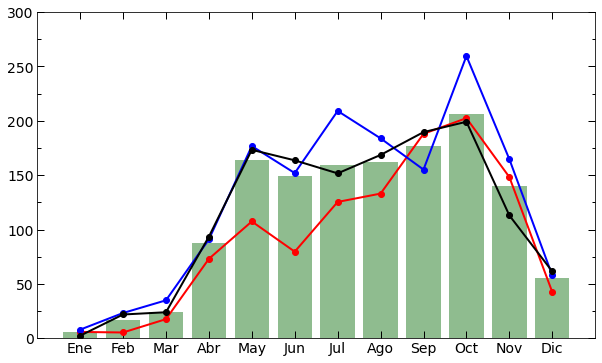

In [ ]:
plt.rcParams["figure.figsize"]=(10, 6)
fig, ax = plt.subplots()
ax.set_xlim(0,13)
ax.set_ylim(0,300)
Dias=[1,2,3,4,5,6,7,8,9,10,11,12]

#ax.set_ylabel('Precipitación [mm]', fontsize = 14)
#ax.tick_params(axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 5)
#ax.tick_params(axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 5)
#stemlines= ax.stem(SerieAnual.index,SerieAnual['Valor'],markerfmt=' ',basefmt=" ")
#plt.setp(stemlines, 'linewidth', 4.5, color='green')

plt.bar(Dias,[mean(Ene),mean(Feb),mean(Mar),mean(Abr),mean(May),mean(Jun),mean(Jul),mean(Ago),mean(Sep),mean(Oct),mean(Nov),mean(Dic)],color="darkseagreen")
#plt.setp(stemlines, 'linewidth', 20, color='darkseagreen')

NiñoT=np.array(MeanNiño)
NiñaT=np.array(MeanNiña)
NeutralT=np.array(MeanNeutral)

per25niño=np.array([np.percentile(EneNiño,25,axis=0),np.percentile(FebNiño,25,axis=0),np.percentile(MarNiño,25,axis=0),np.percentile(AbrNiño,25,axis=0),np.percentile(MayNiño,25,axis=0),np.percentile(JunNiño,25,axis=0),np.percentile(JulNiño,25,axis=0),np.percentile(AgoNiño,25,axis=0),np.percentile(SepNiño,25,axis=0),np.percentile(OctNiño,25,axis=0),np.percentile(NovNiño,25,axis=0),np.percentile(DicNiño,25,axis=0)])
per75niño=np.array([np.percentile(EneNiño,75,axis=0),np.percentile(FebNiño,75,axis=0),np.percentile(MarNiño,75,axis=0),np.percentile(AbrNiño,75,axis=0),np.percentile(MayNiño,75,axis=0),np.percentile(JunNiño,75,axis=0),np.percentile(JulNiño,75,axis=0),np.percentile(AgoNiño,75,axis=0),np.percentile(SepNiño,75,axis=0),np.percentile(OctNiño,75,axis=0),np.percentile(NovNiño,75,axis=0),np.percentile(DicNiño,75,axis=0)])

per25niña=np.array([np.percentile(EneNiña,25,axis=0),np.percentile(FebNiña,25,axis=0),np.percentile(MarNiña,25,axis=0),np.percentile(AbrNiña,25,axis=0),np.percentile(MayNiña,25,axis=0),np.percentile(JunNiña,25,axis=0),np.percentile(JulNiña,25,axis=0),np.percentile(AgoNiña,25,axis=0),np.percentile(SepNiña,25,axis=0),np.percentile(OctNiña,25,axis=0),np.percentile(NovNiña,25,axis=0),np.percentile(DicNiña,25,axis=0)])
per75niña=np.array([np.percentile(EneNiña,75,axis=0),np.percentile(FebNiña,75,axis=0),np.percentile(MarNiña,75,axis=0),np.percentile(AbrNiña,75,axis=0),np.percentile(MayNiña,75,axis=0),np.percentile(JunNiña,75,axis=0),np.percentile(JulNiña,75,axis=0),np.percentile(AgoNiña,75,axis=0),np.percentile(SepNiña,75,axis=0),np.percentile(OctNiña,75,axis=0),np.percentile(NovNiña,75,axis=0),np.percentile(DicNiña,75,axis=0)])

per25neutral=np.array([np.percentile(EneNeutral,25,axis=0),np.percentile(FebNeutral,25,axis=0),np.percentile(MarNeutral,25,axis=0),np.percentile(AbrNeutral,25,axis=0),np.percentile(MayNeutral,25,axis=0),np.percentile(JunNeutral,25,axis=0),np.percentile(JulNeutral,25,axis=0),np.percentile(AgoNeutral,25,axis=0),np.percentile(SepNeutral,25,axis=0),np.percentile(OctNeutral,25,axis=0),np.percentile(NovNeutral,25,axis=0),np.percentile(DicNeutral,25,axis=0)])
per75neutral=np.array([np.percentile(EneNeutral,75,axis=0),np.percentile(FebNeutral,75,axis=0),np.percentile(MarNeutral,75,axis=0),np.percentile(AbrNeutral,75,axis=0),np.percentile(MayNeutral,75,axis=0),np.percentile(JunNeutral,75,axis=0),np.percentile(JulNeutral,75,axis=0),np.percentile(AgoNeutral,75,axis=0),np.percentile(SepNeutral,75,axis=0),np.percentile(OctNeutral,75,axis=0),np.percentile(NovNeutral,75,axis=0),np.percentile(DicNeutral,75,axis=0)])

#per25niña=np.percentile(NiñaT,25,axis=0)
#per75niña=np.percentile(NiñaT,75,axis=0)
#IQRniña=per75niña-per25niña
#per25neutral=np.percentile(NeutralT,25,axis=0)
#per75neutral=np.percentile(NeutralT,75,axis=0)
#IQRneutral=per75neutral-per25neutral

#trans1 = Affine2D().translate(-0.2, 0.0) + ax.transData
#trans2 = Affine2D().translate(+0.2, 0.0) + ax.transData
plt.errorbar(np.arange(1,13,1), MeanNiño, marker="o", lw=2, ecolor='red',mfc="red",c="red")
#plt.errorbar(np.arange(1,13,1),per25niño,per75niño,fmt='.k', ecolor='red', lw=2)
plt.errorbar(np.arange(1,13,1), MeanNiña, marker="o",lw=2, ecolor='blue',mfc="blue",c="blue")
plt.errorbar(np.arange(1,13,1), MeanNeutral, marker="o", lw=2, ecolor='black',mfc="black",c="black")

#plt.boxplot(Niño, showfliers=False, showmeans = True, capprops=dict(color="red"), whiskerprops=dict(color="red"), boxprops=dict(color="red"), medianprops = dict(color ="red"), meanprops = dict(marker = "x", markersize = 6, markeredgecolor = "red"))
#plt.boxplot(Niña, showfliers=False, showmeans = True, capprops=dict(color="blue"), whiskerprops=dict(color="blue"), boxprops=dict(color="blue"), medianprops = dict(color ="blue"), meanprops = dict(marker = "x", markersize = 6, markeredgecolor = "blue"))
#plt.boxplot(means, whis = [0,100], showmeans = True, medianprops = dict(color = "black"), meanprops = dict(marker = "x", markersize = 6, markeredgecolor = "green"))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov','Dic'])
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) 
ax.tick_params(direction='in',axis = 'x', which = 'major', labelsize = 14, width = 1.0, length = 7)
ax.tick_params(direction='in',axis = 'y', which = 'major', labelsize = 14,width = 1.0, length = 7)
ax.tick_params(direction='in',which = 'minor', width = 1.0, length = 3.5)
ax.xaxis.set_ticks_position('both') 
ax.yaxis.set_ticks_position('both')

Percentiles=pd.DataFrame(data=[per75niño-per25niño,per75niña-per25niña,per75neutral-per25neutral])
Percentiles.columns=['E','F','M','A','M','J','J','A','S','O','N','D']
Percentiles
